# Credit Risk Modelling – Exploratory Data Analysis (EDA)

## Objective
The goal of this notebook is to:
- Identify key drivers of credit risk
- Compare borrower characteristics across risk classes
- Validate economic intuition before modeling

EDA ensures that the PD model is both **statistically sound and business-interpretable**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
DATA_PATH = "../data/german_credit_data.csv"
df = pd.read_csv(DATA_PATH)

# Drop index column
df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Credit Risk Distribution

Understanding class imbalance is essential for PD modeling.

In [4]:
df["Risk"].value_counts(normalize=True)

Risk
good   0.70
bad    0.30
Name: proportion, dtype: float64

## Age vs Credit Risk

Question:
Do younger borrowers exhibit higher default risk?

In [5]:
df.groupby("Risk")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
bad,300.00,33.96,11.22,19.00,25.00,31.00,40.00,74.00
good,700.00,36.22,11.38,19.00,27.00,34.00,42.25,75.00


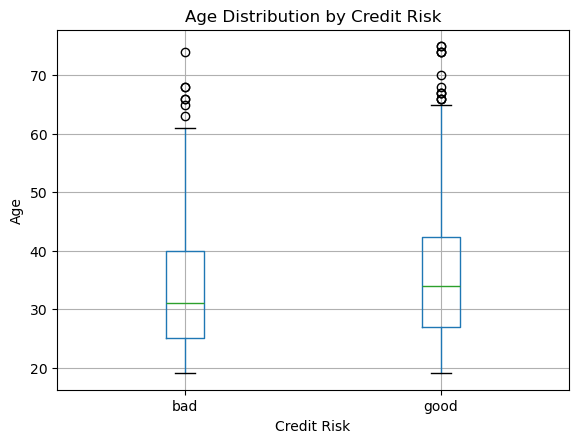

In [6]:
df.boxplot(column="Age", by="Risk")
plt.title("Age Distribution by Credit Risk")
plt.suptitle("")
plt.xlabel("Credit Risk")
plt.ylabel("Age")
plt.show()

## Credit Amount vs Credit Risk

Question:
Do higher loan amounts increase default risk?

In [7]:
df.groupby("Risk")["Credit amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
bad,300.00,3938.13,3535.82,433.00,1352.50,2574.50,5141.50,18424.00
good,700.00,2985.46,2401.47,250.00,1375.50,2244.00,3634.75,15857.00


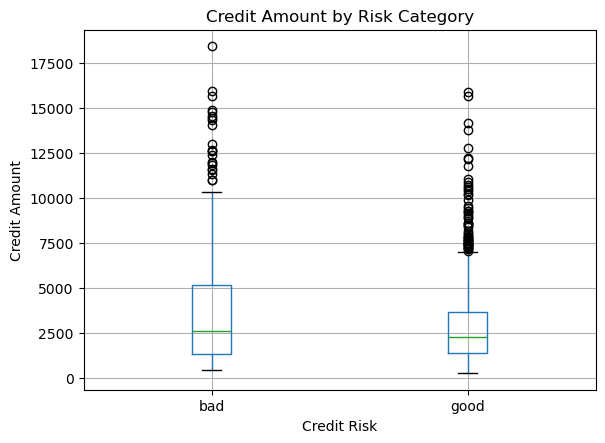

In [8]:
df.boxplot(column="Credit amount", by="Risk")
plt.title("Credit Amount by Risk Category")
plt.suptitle("")
plt.xlabel("Credit Risk")
plt.ylabel("Credit Amount")
plt.show()

## Loan Duration vs Credit Risk

Question:
Does longer repayment duration increase credit risk?

In [12]:
df.groupby("Risk")["Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
bad,300.00,24.86,13.28,6.00,12.00,24.00,36.00,72.00
good,700.00,19.21,11.08,4.00,12.00,18.00,24.00,60.00


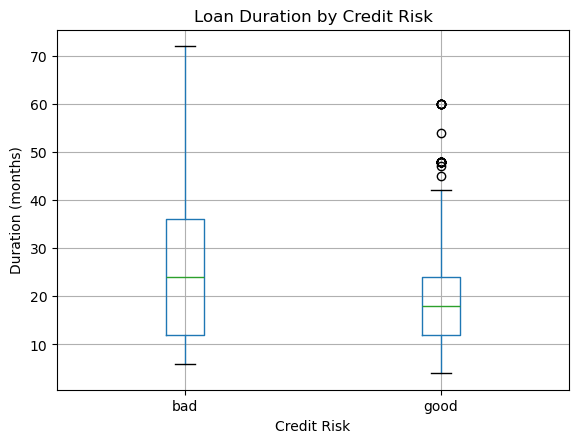

In [9]:
df.boxplot(column="Duration", by="Risk")
plt.title("Loan Duration by Credit Risk")
plt.suptitle("")
plt.xlabel("Credit Risk")
plt.ylabel("Duration (months)")
plt.show()

## Employment Level (Job) vs Credit Risk

Higher job stability should reduce default risk.

In [10]:
pd.crosstab(df["Job"], df["Risk"], normalize="index")

Risk,bad,good
Job,,
0,0.32,0.68
1,0.28,0.72
2,0.30,0.70
3,0.34,0.66


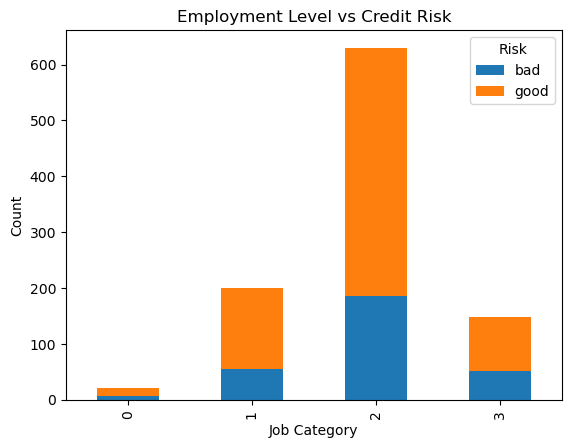

In [11]:
pd.crosstab(df["Job"], df["Risk"]).plot(kind="bar", stacked=True)
plt.title("Employment Level vs Credit Risk")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.show()

## Housing Status vs Credit Risk

Housing ownership often reflects financial stability.

In [13]:
pd.crosstab(df["Housing"], df["Risk"], normalize="index")

Risk,bad,good
Housing,,
free,0.41,0.59
own,0.26,0.74
rent,0.39,0.61


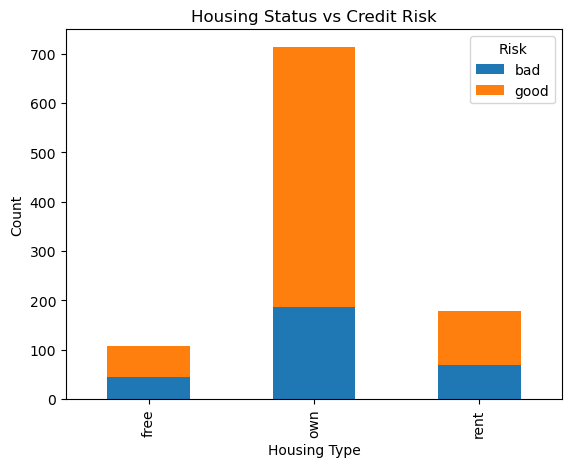

In [14]:
pd.crosstab(df["Housing"], df["Risk"]).plot(kind="bar", stacked=True)
plt.title("Housing Status vs Credit Risk")
plt.xlabel("Housing Type")
plt.ylabel("Count")
plt.show()

## Saving Accounts vs Credit Risk

Missing values are treated as a separate behavioral signal.


In [15]:
pd.crosstab(df["Saving accounts"].fillna("missing"), df["Risk"], normalize="index")


Risk,bad,good
Saving accounts,,
little,0.36,0.64
missing,0.17,0.83
moderate,0.33,0.67
quite rich,0.17,0.83
rich,0.12,0.88


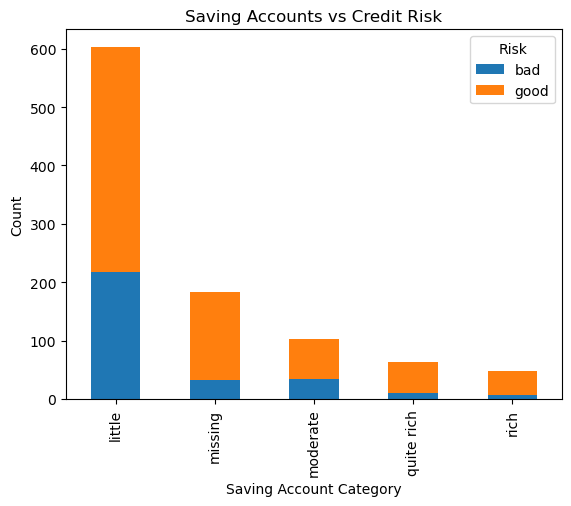

In [ ]:
pd.crosstab(df["Saving accounts"].fillna("missing"), df["Risk"]).plot(
    kind="bar", stacked=True
)
plt.title("Saving Accounts vs Credit Risk")
plt.xlabel("Saving Account Category")
plt.ylabel("Count")
plt.show()

## Checking Account vs Credit Risk


In [ ]:
pd.crosstab(df["Checking account"].fillna("missing"), df["Risk"], normalize="index")

Risk,bad,good
Checking account,,
little,0.49,0.51
missing,0.12,0.88
moderate,0.39,0.61
rich,0.22,0.78


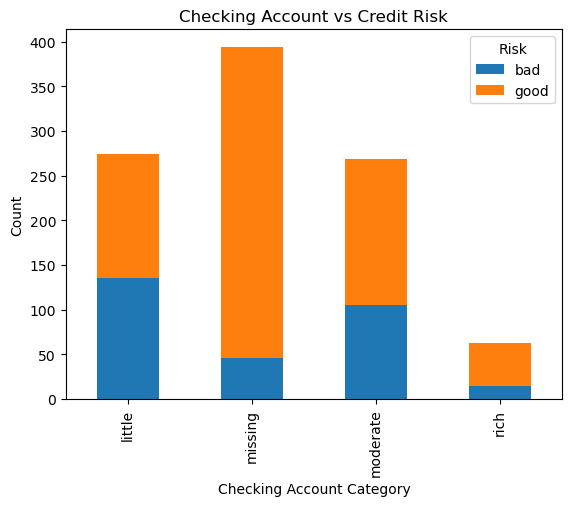

In [ ]:
pd.crosstab(df["Checking account"].fillna("missing"), df["Risk"]).plot(
    kind="bar", stacked=True
)
plt.title("Checking Account vs Credit Risk")
plt.xlabel("Checking Account Category")
plt.ylabel("Count")
plt.show()

## Loan Purpose vs Credit Risk


In [ ]:
pd.crosstab(df["Purpose"], df["Risk"], normalize="index").sort_values("bad", ascending=False)

Risk,bad,good
Purpose,,
vacation/others,0.42,0.58
education,0.39,0.61
repairs,0.36,0.64
business,0.35,0.65
domestic appliances,0.33,0.67
furniture/equipment,0.32,0.68
car,0.31,0.69
radio/TV,0.22,0.78


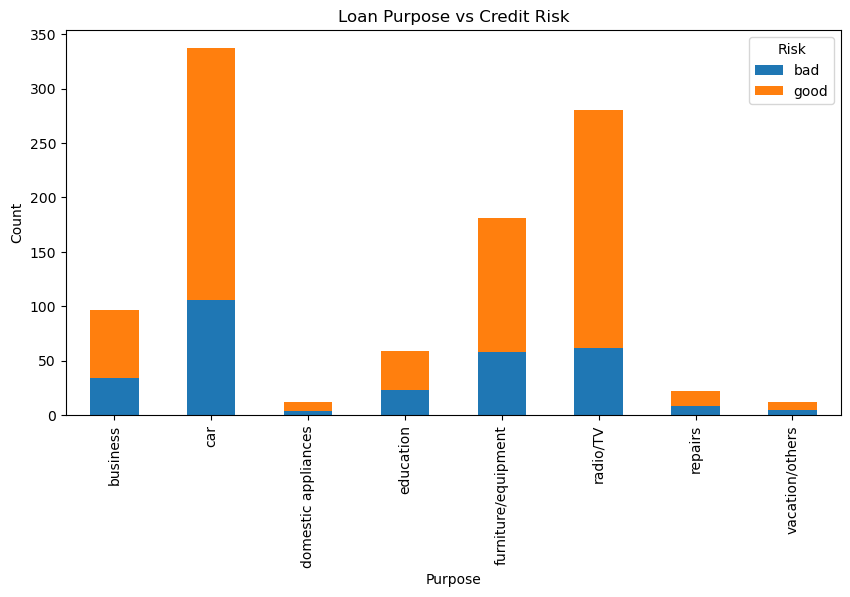

In [ ]:
pd.crosstab(df["Purpose"], df["Risk"]).plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Loan Purpose vs Credit Risk")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.show()

## Key Insights from Exploratory Data Analysis

- Younger borrowers exhibit higher default risk compared to older applicants.
- Longer loan durations are strongly associated with increased credit risk.
- Low or missing saving account balances significantly increase default probability.
- Checking account balance is one of the most powerful behavioral predictors of credit risk.
- Loan purpose reveals meaningful risk segmentation, with education and furniture-related loans showing higher risk.

Overall, the observed patterns are economically intuitive and consistent with real-world retail credit behavior. 
These insights validate the selected variables for inclusion in the Probability of Default (PD) modeling stage.
